In [1]:
import matplotlib.pyplot as plt
import requests
import numpy as np
from datetime import datetime
import json
import pandas as pd
import copy
import time

# Question 1
&emsp;Suppose a client has 1,000 USD per month to invest. She decides to
invest in Bitcoin using the Dollar Average Cost method. She decides to
invest on the _x_ day of each month (x range from 1 to 30) yet she cannot
decide which exact day to invest. The purpose is to test each day (x from 1
to 30) and determine which x value will yield the best result

## Define the question
&emsp; First, I am going to explory the trend of BTC/USD with pass **1 year** and pass **5 year**,<br>  and analysis which trend of year more suitable to do the analysis.


In [2]:
def get_current_dat1(coin='bitcoin',currency='USD', days='max',exchange=''):
    url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?"

    
    parameters = {'id':coin,
                  'vs_currency': currency,
                  'days': days,
                  }
    
    if exchange:
        print('exchange: ', exchange)
        parameters['e'] = exchange
        
    # response comes as json
    response = requests.get(url, params=parameters)   
    data = response.json()
    hist = json.dumps(data)
    data = pd.read_json(hist , orient='records')
    data['prices']= data['prices'].astype(str)
    spec_chars = ["[","]"]
    for char in spec_chars:
        data['prices'] = data['prices'].str.replace(char, ' ', regex=False)
    data = data['prices'].str.split(',', expand=True)
    data.columns = ['time', 'price']
    data['time'] = pd.to_datetime(data['time'],unit='ms')
    years = data['time']
    data['price'] = data['price'].astype(float)
    plt.plot(years, data['price'], 'g--')
    return data


,time,price
0,2016-06-12 00:00:00,671.712278
1,2016-06-13 00:00:00,704.291852
2,2016-06-14 00:00:00,685.932132
3,2016-06-15 00:00:00,693.227000
4,2016-06-16 00:00:00,765.463000
...,...,...
1821,2021-06-07 00:00:00,35834.474474
1822,2021-06-08 00:00:00,33451.383407
1823,2021-06-09 00:00:00,33557.150683
1824,2021-06-10 00:00:00,37553.643759


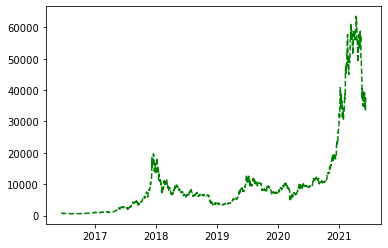

In [4]:
#Five year dataframe
get_current_dat1('bitcoin', 'USD',1825)

&emsp;This result show that the last five year price of BTC/USD.
Before 2021,<br> Bitcoin havent reach more then **21000** of BTC/USD And 2021 has reach over **60000** of BTC/USD.

,time,price
0,2020-06-11 00:00:00,9874.898682
1,2020-06-12 00:00:00,9325.996856
2,2020-06-13 00:00:00,9469.533298
3,2020-06-14 00:00:00,9469.473456
4,2020-06-15 00:00:00,9345.960908
...,...,...
361,2021-06-07 00:00:00,35834.474474
362,2021-06-08 00:00:00,33451.383407
363,2021-06-09 00:00:00,33557.150683
364,2021-06-10 00:00:00,37553.643759


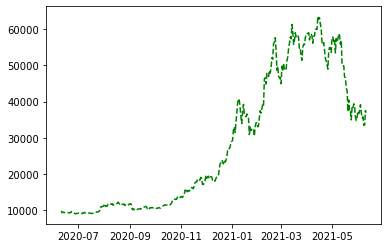

In [5]:
#One year dataframe
get_current_dat1('bitcoin', 'USD',365)

&emsp;This result show the pass year of BTC/USD.
Start from 2020-12 bitcoin/USD keep increasing and BTC/USD, In **2021 April**, bitcoin/USD once reach **highest** price.

&emsp;Since we knew more about the BTC/USD trend. I think we can test the output of pass one year BTC/USD by using **Dollar Average Cost method**. Due to value of BTC/USD are higher in pass one year. Using only pass year data to see the result will be more variable then five year.

In [6]:
def get_current_dat(coin='bitcoin',currency='USD', days='max',exchange='',x=1):
    url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?"

    
    parameters = {'id':coin,
                  'vs_currency': currency,
                  'days': days,
                  }
    
    if exchange:
        print('exchange: ', exchange)
        parameters['e'] = exchange
        
    # response comes as json
    response = requests.get(url, params=parameters)   
    data = response.json()
    hist = json.dumps(data)
    data = pd.read_json(hist , orient='records')
    data['prices']= data['prices'].astype(str)
    spec_chars = ["[","]"]
    for char in spec_chars:
        data['prices'] = data['prices'].str.replace(char, ' ', regex=False)
    data = data['prices'].str.split(',', expand=True)
    data.columns = ['time', 'price']
    data['price'] = data['price'].astype(float)
    data['time'] = pd.to_datetime(data['time'],unit='ms')
    data['day'] = pd.to_datetime(data['time'], format='%d')
    data['day'] = data["day"].map(lambda a: a.day)
    data =data[(data.day == x)]
    data['div'] = data.loc[:,'price'].rdiv(1000)
    data['grandcoin'] = data['div'].cumsum(skipna = False) 
    
    return data['grandcoin'].iloc[-1]

For that, I  wrote a function which can output the **grand total of bitcoin earning** for each day.

In [311]:
for x in range(1,31):
    print("Dollar Average Cost method grand total earn in day ", x ,"=", get_current_dat('BTC','USD',365,'', x))

Dollar Average Cost method grand total earn in day  1 = 0.6476877389730457
Dollar Average Cost method grand total earn in day  2 = 0.6427216358244514
Dollar Average Cost method grand total earn in day  3 = 0.649312061490701
Dollar Average Cost method grand total earn in day  4 = 0.652377129609197
Dollar Average Cost method grand total earn in day  5 = 0.6547390945459028
Dollar Average Cost method grand total earn in day  6 = 0.6414895122757995
Dollar Average Cost method grand total earn in day  7 = 0.6355874905432743
Dollar Average Cost method grand total earn in day  8 = 0.6399907950430744
Dollar Average Cost method grand total earn in day  9 = 0.6573106233309539
Dollar Average Cost method grand total earn in day  10 = 0.7024143959390396
Dollar Average Cost method grand total earn in day  11 = 0.699541252467734
Dollar Average Cost method grand total earn in day  12 = 0.7071072921143116
Dollar Average Cost method grand total earn in day  13 = 0.7012705624827676
Dollar Average Cost meth

# Conclusion
For the result, Dollar Average Cost method grand total earn in **day 12 = 0.7071072921143116**, <br>thats mean if she invest on the **12** day of each month for pass year, <br>She will own **0.707 bitcoin** by now, which is the highest value. 
<br>I suggest she invest on the **12** day of each month for getting the best result base on the pass one year data.

## Question2
&emsp;A cryptocurrency hedge fund manager studies the 15min and daily chart of
Bitcoin and advises his clients: “you should buy bitcoin every Sunday at 1
am in the morning, and sell bitcoin on the following Friday at 7 am in the
morning.”. Back test, starting from 2015 and see if this fund manager’s
claim is valid or not. a) the success rate of the above claim; b) if the client
starts from 1 million USD on 2018 June 1 and performs this strategy
robotically, what would be the client’s asset per 2021 June 1?


# a)&emsp;the success rate of the above claim
&emsp;First of all, we knew that CoinGecko api was using unix time to record the data.
I am going export the unix time from **2015 jan to 2021 june**


In [7]:
#Since we knew that first sunday of 2015 june 04/01,we can make a dataframe by week
start = pd.date_range(start = '2015-01-04 01:00:00',end ='2021-06-01 00:00:00', freq='W')
end = pd.date_range(start = '2015-01-09 08:00:00',end ='2021-06-01 00:00:00', freq='W')

df1 = pd.DataFrame({ 'start': start,'end': end }) 
df1['start'] = (df1['start'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
df1['end'] = (df1['end'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
df1
display(df1)

,start,end
0,1420333200,1420963200
1,1420938000,1421568000
2,1421542800,1422172800
3,1422147600,1422777600
4,1422752400,1423382400
...,...,...
329,1619312400,1619942400
330,1619917200,1620547200
331,1620522000,1621152000
332,1621126800,1621756800


&emsp;After we find the UNIX timestamp,we able to find the price of USD/BTC between each week of **Sunday at 1 am and  Friday at 7 am.**


In [95]:
def make(coin='bitcoin',currency='USD', fm=1527987600, to=1528614000,exchange=''):
    url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range?"

    
    parameters = {'id':coin,
                  'vs_currency': currency,
                  'from': fm,
                  'to': to,
                  }
    
    if exchange:
        print('exchange: ', exchange)
        parameters['e'] = exchange
        
    # response comes as json
    response = requests.get(url, params=parameters)   
    data = response.json()
    hist = json.dumps(data)
    data = pd.read_json(hist , orient='index')
    data = data.T 
    data['prices']= data['prices'].astype(str)
    spec_chars = ["[","]"]
    for char in spec_chars:
        data['prices'] = data['prices'].str.replace(char, ' ', regex=False)
    data = data['prices'].str.split(',', expand=True)
    data.columns = ['time', 'price']
    data['time'] = pd.to_datetime(data['time'],unit='ms')
    data['price'] = data['price'].astype(float)
    Startprice = data.iloc[0]['price']
    Endprice = data.iloc[-1]['price']
    return Startprice,Endprice


In [98]:
caselist = list()
for i, row in df1.iterrows():
    time.sleep(0.5)
    caselist.append(make('bitcoin','Usd',row['start'],row['end']))
    print(caselist)

    


[(273.22, 267.184)]
[(273.22, 267.184), (268.353667700943, 208.9892)]
[(273.22, 267.184), (268.353667700943, 208.9892), (214.545, 253.8388999999999)]
[(273.22, 267.184), (268.353667700943, 208.9892), (214.545, 253.8388999999999), (271.2882000000001, 226.2697)]
[(273.22, 267.184), (268.353667700943, 208.9892), (214.545, 253.8388999999999), (271.2882000000001, 226.2697), (240.0193, 222.9061)]
[(273.22, 267.184), (268.353667700943, 208.9892), (214.545, 253.8388999999999), (271.2882000000001, 226.2697), (240.0193, 222.9061), (220.0922, 232.9962)]
[(273.22, 267.184), (268.353667700943, 208.9892), (214.545, 253.8388999999999), (271.2882000000001, 226.2697), (240.0193, 222.9061), (220.0922, 232.9962), (235.9199, 235.5529999999999)]
[(273.22, 267.184), (268.353667700943, 208.9892), (214.545, 253.8388999999999), (271.2882000000001, 226.2697), (240.0193, 222.9061), (220.0922, 232.9962), (235.9199, 235.5529999999999), (238.1319, 257.7075)]
[(273.22, 267.184), (268.353667700943, 208.9892), (214.54

In [124]:
da1 = pd.Series(caselist ,name='price')
da1= da1.astype(str)
spec_chars = ["(",")"]
for char in spec_chars:
    da1 = da1.str.replace(char, ' ', regex=False)
    da2 = da1.str.split(',', expand=True)
    da2.columns = ['startprice', 'endprice']

In [125]:
da2

,startprice,endprice
0,273.22,267.184
1,268.353667700943,208.9892
2,214.545,253.8388999999999
3,271.2882000000001,226.2697
4,240.0193,222.9061
...,...,...
329,49888.52673157689,56874.43203673815
330,57504.33531773738,58384.26782776662
331,58487.67263198862,49071.27437213592
332,47342.25100873092,36582.278316850185


In [128]:
record = pd.merge(df1, da2, left_index=True, right_index=True)
record

,start,end,startprice,endprice
0,1420333200,1420963200,273.22,267.184
1,1420938000,1421568000,268.353667700943,208.9892
2,1421542800,1422172800,214.545,253.8388999999999
3,1422147600,1422777600,271.2882000000001,226.2697
4,1422752400,1423382400,240.0193,222.9061
...,...,...,...,...
329,1619312400,1619942400,49888.52673157689,56874.43203673815
330,1619917200,1620547200,57504.33531773738,58384.26782776662
331,1620522000,1621152000,58487.67263198862,49071.27437213592
332,1621126800,1621756800,47342.25100873092,36582.278316850185


&emsp;Since we get the start time price and end time price,
We able to using **(endprice - startprice	)** to mearsure successful rate
For example: if the price in Sunday at 1 am :800 BTC/USD - 
firday at 7 am:=1000 BTC/USD 
answer = 200 BTC/USD
if the value is **postive** = **sucessful**

In [164]:
record['cal'] = record['endprice'].astype('float') - record['startprice'].astype('float')
record['cal'] = (record['cal']> 0)
true_count = (record['cal']).value_counts()[True]
false_count = (record['cal']).value_counts()[False]
print("count of postive value ",true_count)
print("count of negative value ",False_count)

count of postive value  190
count of negative value  144


In [185]:
#The success rate = true_count/(true_count+False_count)
SR = true_count/(true_count+ False_count)
percentage = "{:.2%}".format(SR)
print("The sucessful rate from 2015 jan to 2016 june by \nbuy at sunday",
      "1 am sell at firday 7 am was",percentage)

The sucessful rate from 2015 jan to 2016 june by 
buy at sunday 1 am sell at firday 7 am was 56.89%


Even the succesful rate is higher then **56.89%**, <br>But its doesn't mean that must be profitable, Because we need to measure about the scale of the value.

## b)&emsp; if the client starts from 1 million USD on 2018 June 1 and performs this strategy robotically, what would be the client’s asset per 2021 June 1?

&emsp;Since we knew that first sunday of **2018 june is 06/03**,we can make a dataframe by week.


In [231]:
start1 = pd.date_range(start = '2018-06-03 01:00:00',end ='2021-06-01 00:00:00', freq='W')
end1 = pd.date_range(start = '2018-06-08 08:00:00',end ='2021-06-01 00:00:00', freq='W')
df = pd.DataFrame({ 'start': start1,'end': end1 }) 
df['start'] = (df['start'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
df['end'] = (df['end'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
df

,start,end
0,1527987600,1528617600
1,1528592400,1529222400
2,1529197200,1529827200
3,1529802000,1530432000
4,1530406800,1531036800
...,...,...
151,1619312400,1619942400
152,1619917200,1620547200
153,1620522000,1621152000
154,1621126800,1621756800


In [232]:
#Now, we able to use the reord start and end price in df1
df = df.merge(record, on='start', how='left')
df['startprice'] = df['startprice'].astype('float') 
df['endprice'] = df['endprice'].astype('float') 
df

,start,end_x,end_y,startprice,endprice,cal
0,1527987600,1528617600,1528617600,7584.516703,7224.378697,False
1,1528592400,1529222400,1529222400,7289.560377,6497.725841,False
2,1529197200,1529827200,1529827200,6495.058961,5915.317390,False
3,1529802000,1530432000,1530432000,6135.349641,6333.437615,True
4,1530406800,1531036800,1531036800,6319.528240,6718.768902,True
...,...,...,...,...,...,...
151,1619312400,1619942400,1619942400,49888.526732,56874.432037,True
152,1619917200,1620547200,1620547200,57504.335318,58384.267828,True
153,1620522000,1621152000,1621152000,58487.672632,49071.274372,False
154,1621126800,1621756800,1621756800,47342.251009,36582.278317,False


In [233]:
asset = 1000000
for i in range(0,155):
    asset = asset/df['startprice'][i]*df['endprice'][i]
    print(asset)

952516.6836198454
849048.7696334117
773263.642700197
798229.4942809636
848658.20660553
790519.067929991
935074.090744926
1032454.8833963976
873500.366503833
796820.1407940462
806476.4707990517
841919.9651949896
905447.7134843728
786892.1292161049
822185.6698737416
851349.9972965912
830118.7256442145
827883.5212897544
797881.3209387972
826657.7225150056
814455.4211886001
807462.9876164201
813196.0273137661
715296.182912289
482948.4890150317
518893.84893272474
425086.3327841873
403159.59649554506
499170.072002275
470877.6452997929
480273.7327728685
454013.69451941666
464300.9152664756
449653.63394947397
436802.3382400331
455622.8387580673
452825.5369765214
521602.9617978385
482111.0674165688
490970.73744095647
496110.4953161215
497077.30585565016
507864.9381986047
635981.5912879766
637051.8977270775
666703.1416004823
658607.392261683
721861.431975852
920940.4868966701
1030425.6700545623
1123562.5645308187
1199988.8823500022
1107740.433590496
1294489.0462820998
1582438.549998571
1738394.1

In [221]:
asset

4452184.659576974

In [236]:
n = asset/1000000
percentage = "{:.2%}".format(n)
percentage

'445.22%'

If the client starts from **1 million USD** on 2018 June 1 and performs this strategy robotically, <br> At the end of 2021 June 1,<br>  She will own **4.45 million USD**
,And its increase **445.22%**.